### E8-3 Mean Shift Algorithm for Face Recognition

This is an example of implementation of Mean-Shift algorithm for segmentation of images. The algorithms aims at recognizing faces (light pixels) from the background (darker pixels).
Mean-Shift algorithm determines the number of clusters and formes the clusters.

## 1. Developing Environment

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, MeanShift

from sklearn import metrics
import matplotlib.pyplot as plt

# Python Imaging Library
from PIL import Image

from scipy.spatial.distance import cdist


## 2. Loading Data

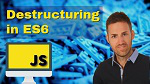

In [2]:
# Read the image file
OUR_IMAGE = 'Destructuring.jpg'
#OUR_IMAGE = '../images/TechBBQ.jpg'
image = Image.open(OUR_IMAGE)
image

The algorithm expects the data stored into a data frame. Each pixel is presented by two coordinates and three colors in the RGB schema: red, green, and Blue, each measured with a value between 0 and 255.

In [3]:
image.size

(150, 84)

In [4]:
# Convert image pixels to numpy array
pix_array = np.array(image)
pix_array

array([[[ 12,  35,  87],
        [ 11,  39,  87],
        [  3,  34,  78],
        ...,
        [  0,   6,   0],
        [  2,   5,   0],
        [  1,   1,   0]],

       [[ 13,  49,  99],
        [ 14,  55, 101],
        [  7,  50,  92],
        ...,
        [  0,   3,   2],
        [  0,   5,   2],
        [  0,   2,   0]],

       [[  9,  57, 103],
        [ 15,  69, 113],
        [ 11,  64, 104],
        ...,
        [  0,  12,  29],
        [  0,  22,  37],
        [  0,  25,  37]],

       ...,

       [[ 21,  83, 130],
        [ 14,  63, 103],
        [  0,  34,  67],
        ...,
        [ 30,  31,  35],
        [ 27,  30,  35],
        [ 26,  31,  37]],

       [[ 23,  68, 110],
        [  8,  38,  72],
        [  0,   6,  31],
        ...,
        [ 29,  30,  34],
        [ 27,  28,  33],
        [ 24,  27,  34]],

       [[ 16,  58,  98],
        [  0,  22,  48],
        [  0,   0,  14],
        ...,
        [ 30,  29,  34],
        [ 27,  28,  33],
        [ 24,  24,  32]]

In [5]:
# For test, get the values of pixel[0][0]
pix_array[10][20]

array([  5,  25, 114], dtype=uint8)

In [6]:
# Alternativ way to get the pixel color values
pixels = image.load()
pixels[20,10]

(5, 25, 114)

In [7]:
# Convert the pixels into pandas dataframe, add the coordinates and the RGB values together
df = pd.DataFrame(
    [[x, y, pixels[x, y][0], pixels[x, y][1], pixels[x, y][2]]
        for x in range(image.size[0])
        for y in range(image.size[1])
     ],
    columns=['x', 'y', 'r', 'g', 'b']
)

In [8]:
df.head()

,x,y,r,g,b
0,0,0,12,35,87
1,0,1,13,49,99
2,0,2,9,57,103
3,0,3,4,55,98
4,0,4,7,52,91


## 3. Training a Model

In [9]:
# Train mean-shift model with the data frame
ms_model = MeanShift()
ms_model.fit(df)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [10]:
# See the clusters and cluster centres
ms_model.cluster_centers_

array([[ 76.10405386,  34.68637495,  44.67495975, 138.94570467,
        190.6127616 ],
       [ 61.32238548,  40.08643042, 210.25496975, 183.60025929,
         65.34831461]])

In [11]:
len(ms_model.labels_)

12600

In [12]:
# Create a function to iterate through the data and create clusters
# Remember the variables cluster_centers_ and labels_ from last time?
def image_clusters(model, output):
    # for each cluster
    for i in range(len(model.cluster_centers_)):
        image = Image.open(OUR_IMAGE)
        pixels = image.load()
        # for each pixel
        for j in range(len(df)):
            if (model.labels_[j] != i):
                # make the rest white
                pixels[int(df['x'][j]), int(df['y'][j])] = (255, 255, 255)
        image.save(output + str(i) + '.jpg')       

In [13]:
image_clusters(ms_model, 'meanshift_cluster')

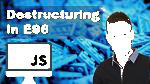

In [14]:
clustered_image0 = Image.open('meanshift_cluster0.jpg')
clustered_image0

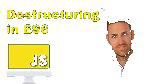

In [15]:
clustered_image1 = Image.open('meanshift_cluster1.jpg')
clustered_image1

## 4. Validating the Model with K-Means

In [16]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,20)
for k in K:
    model = KMeans(n_clusters=k).fit(df)
    model.fit(df)
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [105.05618355418224, 76.71117440317556, 68.78698047640809, 63.012105891905996, 57.723988005891506, 52.51992357507972, 50.359403158908016, 48.40784959698739, 46.17373506318144, 44.52217767525483, 43.013571278020926, 41.79727450800103, 40.56124349029229, 39.32303277518574, 38.35129005791064, 37.442149927408735, 36.66689948445345, 35.88758537908495]


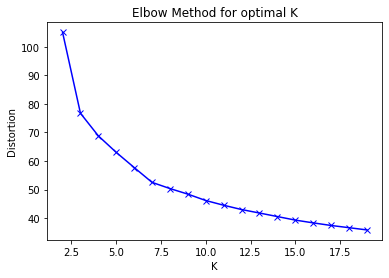

In [17]:
# Plot the elbow
plt.title('Elbow Method for optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [26]:
# K-means model fitting with specified number of clusters
k_means_model = KMeans(n_clusters=8)
k_means_model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
# Create image clusters
image_clusters(k_means_model, 'kmeans_cluster')

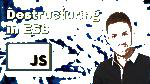

In [28]:
clustered_image0 = Image.open('kmeanscluster0.jpg')
clustered_image0

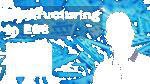

In [29]:
clustered_image1 = Image.open('kmeanscluster1.jpg')
clustered_image1

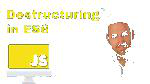

In [30]:
clustered_image2 = Image.open('kmeanscluster2.jpg')
clustered_image2

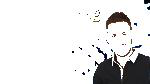

In [31]:
clustered_image3 = Image.open('kmeanscluster3.jpg')
clustered_image3

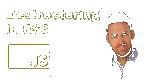

In [32]:
clustered_image4 = Image.open('kmeanscluster4.jpg')
clustered_image4

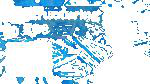

In [33]:
clustered_image5 = Image.open('kmeanscluster5.jpg')
clustered_image5

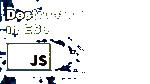

In [34]:
clustered_image6 = Image.open('kmeanscluster6.jpg')
clustered_image6

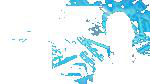

In [35]:
clustered_image7 = Image.open('kmeanscluster7.jpg')
clustered_image7

In [36]:
clustered_image8 = Image.open('kmeanscluster8.jpg')
clustered_image8

FileNotFoundError: [Errno 2] No such file or directory: 'kmeanscluster8.jpg'